In [10]:
import json
import glob, pickle

import numpy as np
import pandas as pd

from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
with open('./train_lima_test_montreal.pk', 'rb') as in_file:
    dfs_train = pickle.load(in_file)

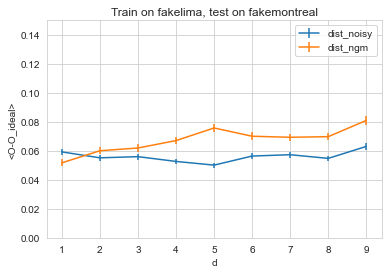

In [58]:
plt.style.use({'figure.facecolor':'white'})

N = 400

y_noisy_train = []
y_noisy_train_err = []
y_ngm_train = []
y_ngm_train_err = []
for depth in dfs_train.keys():
    y_noisy_train.append(dfs_train[depth]['dist_noisy'].mean())
    y_noisy_train_err.append(dfs_train[depth]['dist_noisy'].std() / np.sqrt(N))
    y_ngm_train.append(dfs_train[depth]['dist_ngm'].mean())
    y_ngm_train_err.append(dfs_train[depth]['dist_ngm'].std() / np.sqrt(N))

plt.errorbar(np.arange(1, 10), y_noisy_train, y_noisy_train_err, label='dist_noisy')
plt.errorbar(np.arange(1, 10), y_ngm_train, y_ngm_train_err,  label='dist_ngm')
plt.ylim([0, 0.15])
plt.title('Train on fakelima, test on fakemontreal')
plt.ylabel('<O-O_ideal>')
plt.xlabel('d')
plt.legend()
plt.show()

In [28]:
with open('./train_lima_finetune_montreal_test_montreal.pk', 'rb') as in_file:
    dfs_finetune = pickle.load(in_file)

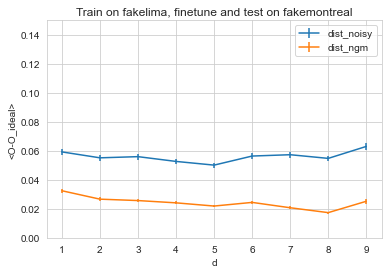

In [59]:
plt.style.use({'figure.facecolor':'white'})

y_noisy_ft = []
y_ngm_ft = []
y_noisy_ft_err = []
y_ngm_ft_err = []
for depth in dfs_finetune.keys():
    y_noisy_ft.append(dfs_finetune[depth]['dist_noisy'].mean())
    y_noisy_ft_err.append(dfs_finetune[depth]['dist_noisy'].std() / np.sqrt(N))
    y_ngm_ft.append(dfs_finetune[depth]['dist_ngm'].mean())
    y_ngm_ft_err.append(dfs_finetune[depth]['dist_ngm'].std() / np.sqrt(N))

plt.errorbar(np.arange(1, 10), y_noisy_ft, y_noisy_ft_err, label='dist_noisy')
plt.errorbar(np.arange(1, 10), y_ngm_ft, y_ngm_ft_err, label='dist_ngm')
plt.ylim([0, 0.15])
plt.title('Train on fakelima, finetune and test on fakemontreal')
plt.ylabel('<O-O_ideal>')
plt.xlabel('d')
plt.legend()

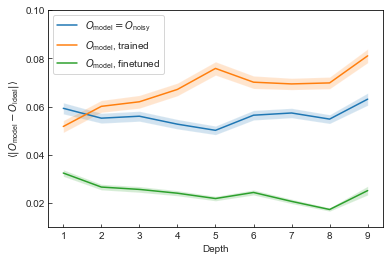

In [95]:
import matplotlib
matplotlib.rc('axes',edgecolor='black')

fig = plt.figure()

x = np.arange(1, 10)
y_noisy_ft = np.array(y_noisy_ft)
y_noisy_ft_err = np.array(y_noisy_ft_err)
y_ngm_train = np.array(y_ngm_train)
y_ngm_train_err = np.array(y_ngm_train_err)
y_ngm_ft = np.array(y_ngm_ft)
y_ngm_ft_err = np.array(y_ngm_ft_err)

alpha = 0.2

plt.plot(x, y_noisy_ft, label=r'$O_{\mathregular{model}}=O_{\mathregular{noisy}}$')
plt.fill_between(x, y_noisy_ft-y_noisy_ft_err, y_noisy_ft+y_noisy_ft_err, alpha=alpha)
plt.plot(x, y_ngm_train, label=r'$O_{\mathregular{model}}$, trained')
plt.fill_between(x, y_ngm_train-y_ngm_train_err, y_ngm_train+y_ngm_train_err, alpha=alpha)
plt.plot(x, y_ngm_ft, label=r'$O_{\mathregular{model}}$, finetuned')
plt.fill_between(x, y_ngm_ft-y_ngm_ft_err, y_ngm_ft+y_ngm_ft_err, alpha=alpha)
plt.ylim([0.01, 0.1])
plt.ylabel(r'$\langle|O_{\mathregular{model}}-O_{\mathregular{ideal}}|\rangle$')
plt.xlabel('Depth')
ax = plt.gca()
ax.grid(False)
for tick in ax.xaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
ax.tick_params(axis='y',direction='in')
ax.tick_params(axis='x',direction='in')
plt.legend()
plt.show()

fig.savefig('./finetune_plot_a.pdf', format='pdf', dpi=300)